<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" align="left" src="https://i.creativecommons.org/l/by-nc-sa/4.0/80x15.png" /></a>&nbsp;| [Emmanuel Rachelson](https://personnel.isae-supaero.fr/emmanuel-rachelson?lang=en) | <a href="https://supaerodatascience.github.io/machine-learning/">https://supaerodatascience.github.io/machine-learning/</a>

<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">XGBoost<br>Introduction to XGBoost</div>

This Practice Course is composed of 3 parts - each part is meant to be done in about 1 hour :
* In the **first notebook**, you learned the **basic of XGBoost**, how to apply it on a dataset and tune it to obtain the best performances.
* In the **second notebook**, we focused on **ensemble methods**.
* Finally in the **last notebook** you will see how the choice of a method (such as XGBoost) is a key element of a tradeoff between **Bias and Variance**. 

We start by a few reminder on the Bias/Variance tradeoff :


**Bias** is the mean error between our prediction and the correct value. A high bias means that our model makes large mistakes, even on the training dataset.

**Variance** is the sensitivity of the prediction to small changes in the dataset. A high variance means that the model performs well on the training dataset, but poorly on the test dataset.

Let's summarize that with a figure :

<img src="img/1 xwtSpR_zg7j7zusa4IDHNQ.png">

In this figure, the center of the target is what we try to predict - as if we were trying to send an arrow in the bullseye zone.
A model with a high bias cannot reach the center - the center of gravity of all its arrows is on the outer part of the target.
A model with a low bias is globally centered on the target.

A model with a high variance is not consistant - its arrows are largely spread.
A model with low variance is very consistant - even when its arrows are not in the right place, they are in a limited zone.

In a machine learning algorithm, it is a *tradeoff* between Bias and Variance : we want to minimize both (low bias, low variance), but usually when one decreases the other increases.


## Regularization


To control overfitting in Gradient Boosted Trees, we can use 3 main leverages : tree structure, shrinkage and randomization.

We already saw that the tree parameters, especially those related to tree depth such as max_depth and gamma, is a way to control the complexity of the model, and therefore the tradeoff bias/variance.


<div class="alert alert-success">
    <b>Exercice 1</b><br>
      Complete the following code to compare the influence of the number of tree on both the bias and the variance. Complete the annotations.
</div>


/tmp/ipykernel_27037/692275863.py:19: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_mask = np.random.randint(0, 2, size=n_samples).astype(np.bool)


ValueError: x and y must have same first dimension, but have shapes (999,) and (0,)

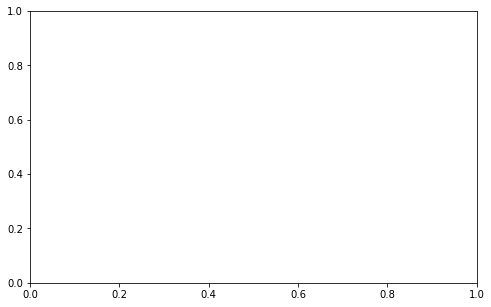

In [1]:
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error

def ground_truth(x):
    """Ground truth -- function to approximate"""
    return x * np.sin(x) + np.sin(2 * x)

def gen_data(n_samples=200):
    """generate training and testing data"""
    np.random.seed(13)
    x = np.random.uniform(0, 10, size=n_samples)
    x.sort()
    y = ground_truth(x) + 0.75 * np.random.normal(size=n_samples)
    train_mask = np.random.randint(0, 2, size=n_samples).astype(np.bool)
    x_train, y_train = x[train_mask, np.newaxis], y[train_mask]
    x_test, y_test = x[~train_mask, np.newaxis], y[~train_mask]
    return x_train, x_test, y_train, y_test

X_train, X_test, y_train, y_test = gen_data(200)

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()

test_list = []
train_list = []
estim_list = []

for n_estimators in range(1,1000):
    estim_list.append(n_estimators)
    ...
    
    
ax.plot(estim_list, test_list, label='Test',
         linewidth=2)
ax.plot(estim_list,train_list, label='Train', linewidth=2)
ax.set_ylabel('Error')
ax.set_xlabel('n_estimators')
ax.set_ylim((0, 2))

ax.annotate('... bias', xy=(900, train_list[900]), xycoords='data',
            xytext=(600, 0.3), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc"),
            )
ax.annotate('... variance', xy=(900, test_list[900]), xycoords='data',
            xytext=(600, 0.4), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc"),
            )
plt.legend(loc='upper right')
plt.show()

## Shrinkage

One of the most usefull technic for regularization in Gradient Boosted Trees is the Shrinkage : the idea is to slow down the training by reducing the prediction of each tree by a scalar - the learning rate. In this way, the model must produce stronger concepts. 

A low learning rate impose a greater number of trees (n_estimators) to have a similar error during training - we are trading training time for some more precision.


<div class="alert alert-success">
    <b>Exercice 2</b><br>
      Reuse and modify the previous code to compare two differente learning rates : 1.0 and 0.1. Conclude by completing the annotations.
</div>


In [ ]:

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()

test_list = []
train_list = []
estim_list = []

test_list_2 = []
train_list_2 = []

for n_estimators in range(1,1000):
    estim_list.append(n_estimators)
    est = ...
    
    est2 = ...
    
    
ax.plot(estim_list, test_list_2, label='Test 0.1',
         linewidth=2)
ax.plot(estim_list,train_list_2, label='Train 0.1', linewidth=2)

ax.plot(estim_list, test_list, label='Test 1.0',
         linewidth=2)
ax.plot(estim_list,train_list, label='Train 1.0', linewidth=2)
ax.set_ylabel('Error')
ax.set_xlabel('n_estimators')
ax.set_ylim((0, 2))



ax.annotate('Requires ... trees', xy=(200, train_list_2[199]), xycoords='data',
            xytext=(300, 1.0), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc"),
            )
ax.annotate('... test error', xy=(900, test_list_2[899]), xycoords='data',
            xytext=(600, 0.5), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc"),
            )
plt.legend(loc='upper right')
plt.show()

## Stochastic Gradient Boosting

As for many other algorithms, introducing randomness during training can lead to a greater precision at the end. There to main parameters that introduce randomness :
* We can subsample the training data before growing each tree
* We can subsample the features before choosing the best split node

[XGBoost list of parameters](https://xgboost.readthedocs.io/en/latest/parameter.html)

<div class="alert alert-success">
    <b>Exercice 3</b><br>
      In XGBoost list of parameters, find the one that control randomness during training.
</div>

# A kaggle challenge : 

To apply what you have learned, we have selected a kaggle challenge that as been solved with XGBoost, a good preprocessing of the data and some fine parameters tuning.

[Link to The Higgs-boson challenge (2014)](https://www.kaggle.com/c/higgs-boson/overview)

Feel free to read the commentaries of the winning solutions - many of the top 30 solutions are using XGBoost in one way or another.

You don't need to create an account on Kaggle, the data are in this github repo (higgs-boson.zip).

<div class="alert alert-success">
    <b>Final Exercice</b><br>
      Use what you have learned to obtain the best score on this dataset.
</div>


Sources :
* https://xgboost.readthedocs.io/en/latest/tutorials/model.html
* https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html